In [330]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

raw = pd.read_csv('../data/US-pumpkins.csv')
# print(raw.head())

In [331]:
# for col in filtered_raw.columns:
#   if filtered_raw[col].dtype == 'object':
#     filtered_raw[col].fillna(filtered_raw[col].mode()[0],inplace=True)
#   else:
#     filtered_raw[col].fillna(filtered_raw[col].median(),inplace=True)
columns_to_select = ['City Name','Package','Variety', 'Origin','Item Size', 'Color']
raw = raw.loc[:, columns_to_select]

raw.dropna(inplace=True)
print(raw)

      City Name       Package            Variety    Origin Item Size   Color
2     BALTIMORE  24 inch bins        HOWDEN TYPE  DELAWARE       med  ORANGE
3     BALTIMORE  24 inch bins        HOWDEN TYPE  VIRGINIA       med  ORANGE
4     BALTIMORE  24 inch bins        HOWDEN TYPE  MARYLAND       lge  ORANGE
5     BALTIMORE  24 inch bins        HOWDEN TYPE  MARYLAND       lge  ORANGE
6     BALTIMORE  36 inch bins        HOWDEN TYPE  MARYLAND       med  ORANGE
...         ...           ...                ...       ...       ...     ...
1694  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1695  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1696  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1697  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1698  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE

[991 rows x 6 columns]


In [332]:
raw = raw[raw['Color'].str.lower().isin(['white','orange'])]

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns

# for col in filtered_raw.columns:
#   if col == 'Color' or col == 'Date': continue
#   c = filtered_raw[col]
#   if c.dtype == 'object':
#     sns.catplot(data=filtered_raw, x='Color',hue=col,kind='count')
#   else:
#     sns.boxplot(x='Color', y=col, data=filtered_raw)
#   plt.show()

In [334]:
removed_features = ['Date', 'Sub Variety', 'Repack']
raw = raw[raw.columns.difference(removed_features)]

In [335]:
pumpkins = raw
print(pumpkins)

      City Name   Color Item Size    Origin       Package            Variety
2     BALTIMORE  ORANGE       med  DELAWARE  24 inch bins        HOWDEN TYPE
3     BALTIMORE  ORANGE       med  VIRGINIA  24 inch bins        HOWDEN TYPE
4     BALTIMORE  ORANGE       lge  MARYLAND  24 inch bins        HOWDEN TYPE
5     BALTIMORE  ORANGE       lge  MARYLAND  24 inch bins        HOWDEN TYPE
6     BALTIMORE  ORANGE       med  MARYLAND  36 inch bins        HOWDEN TYPE
...         ...     ...       ...       ...           ...                ...
1694  ST. LOUIS   WHITE      xlge  ILLINOIS  24 inch bins  HOWDEN WHITE TYPE
1695  ST. LOUIS   WHITE      xlge  ILLINOIS  24 inch bins  HOWDEN WHITE TYPE
1696  ST. LOUIS   WHITE      xlge  ILLINOIS  24 inch bins  HOWDEN WHITE TYPE
1697  ST. LOUIS   WHITE      xlge  ILLINOIS  24 inch bins  HOWDEN WHITE TYPE
1698  ST. LOUIS   WHITE      xlge  ILLINOIS  24 inch bins  HOWDEN WHITE TYPE

[991 rows x 6 columns]


In [336]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ordinal_encoder = OrdinalEncoder(categories=[['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']])
scale_encoder = StandardScaler()
onehot_encoder = OneHotEncoder(sparse_output=False)

ordinal_columns = ['Item Size']
print(pumpkins)
onehot_columns = pumpkins.drop('Color', axis=1).columns.values

encoded_labels = LabelEncoder().fit_transform(pumpkins.Color)
label_encoded_pumpkins = pumpkins.assign(Color=encoded_labels)

ct = ColumnTransformer(transformers=[
  ('ordinal', ordinal_encoder, ordinal_columns),
  ('one hot', onehot_encoder, onehot_columns),
],remainder='passthrough')
ct.set_output(transform='pandas')

transformed = ct.fit_transform(label_encoded_pumpkins)
transformed.rename(columns={'remainder__Color':'Color'},inplace=True)

transformed.head()

      City Name   Color Item Size    Origin       Package            Variety
2     BALTIMORE  ORANGE       med  DELAWARE  24 inch bins        HOWDEN TYPE
3     BALTIMORE  ORANGE       med  VIRGINIA  24 inch bins        HOWDEN TYPE
4     BALTIMORE  ORANGE       lge  MARYLAND  24 inch bins        HOWDEN TYPE
5     BALTIMORE  ORANGE       lge  MARYLAND  24 inch bins        HOWDEN TYPE
6     BALTIMORE  ORANGE       med  MARYLAND  36 inch bins        HOWDEN TYPE
...         ...     ...       ...       ...           ...                ...
1694  ST. LOUIS   WHITE      xlge  ILLINOIS  24 inch bins  HOWDEN WHITE TYPE
1695  ST. LOUIS   WHITE      xlge  ILLINOIS  24 inch bins  HOWDEN WHITE TYPE
1696  ST. LOUIS   WHITE      xlge  ILLINOIS  24 inch bins  HOWDEN WHITE TYPE
1697  ST. LOUIS   WHITE      xlge  ILLINOIS  24 inch bins  HOWDEN WHITE TYPE
1698  ST. LOUIS   WHITE      xlge  ILLINOIS  24 inch bins  HOWDEN WHITE TYPE

[991 rows x 6 columns]


,ordinal__Item Size,one hot__City Name_ATLANTA,one hot__City Name_BALTIMORE,one hot__City Name_BOSTON,one hot__City Name_CHICAGO,one hot__City Name_COLUMBIA,one hot__City Name_DALLAS,one hot__City Name_DETROIT,one hot__City Name_LOS ANGELES,one hot__City Name_MIAMI,...,one hot__Variety_BIG MACK TYPE,one hot__Variety_BLUE TYPE,one hot__Variety_CINDERELLA,one hot__Variety_FAIRYTALE,one hot__Variety_HOWDEN TYPE,one hot__Variety_HOWDEN WHITE TYPE,one hot__Variety_KNUCKLE HEAD,one hot__Variety_MINIATURE,one hot__Variety_PIE TYPE,Color
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [337]:
from sklearn.model_selection import train_test_split

X = transformed.drop('Color', axis=1)
y = transformed['Color']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0,stratify=transformed['Color'])

In [338]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [339]:
from sklearn.metrics import classification_report
pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       251
           1       0.78      0.68      0.73        47

    accuracy                           0.92       298
   macro avg       0.86      0.82      0.84       298
weighted avg       0.92      0.92      0.92       298



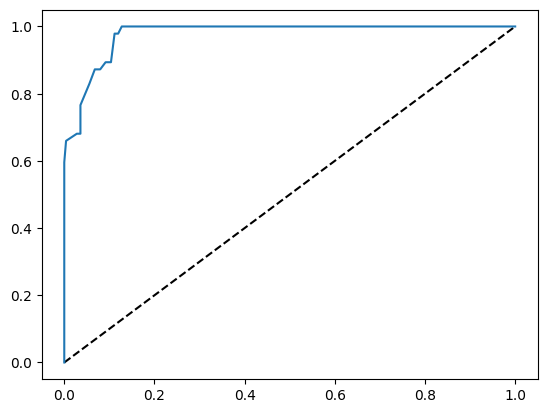

0.9773247435788759


In [343]:
from sklearn.metrics import roc_auc_score, roc_curve
y_score = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,y_score[:,1])
auc = roc_auc_score(y_test,y_score[:, 1])

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()


print(auc)